LABORATORIO - 4 - PRESENCIAL  - Hineill David Céspedes Espinoza - 20213704

PREGUNTA 1 : 
Se tiene una señal obtenida de un EMG (Electromiograma) con 1 activación muscular en el archivo
(EMG_raw.npy). Esta ha sido muestreada a 1 kHz y se encuentra contaminada con ruido de alta frecuencia

a)  ASINCRONA ,  Cargar la señal EMG y graficarla en el dominio del tiempo. Calcular la
transformada de Fourier y graficar la magnitud de la respuesta en frecuencia de la señal,
destacando el ruido a 60 Hz mediante líneas verticales (1 punto)

In [3]:
#-----------IMPORTAMOS LAS LIBRERÍAS
import numpy as np
import matplotlib.pyplot as plt

C:\Users\Hineill\AppData\Local\Temp\ipykernel_26612\2109633090.py:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


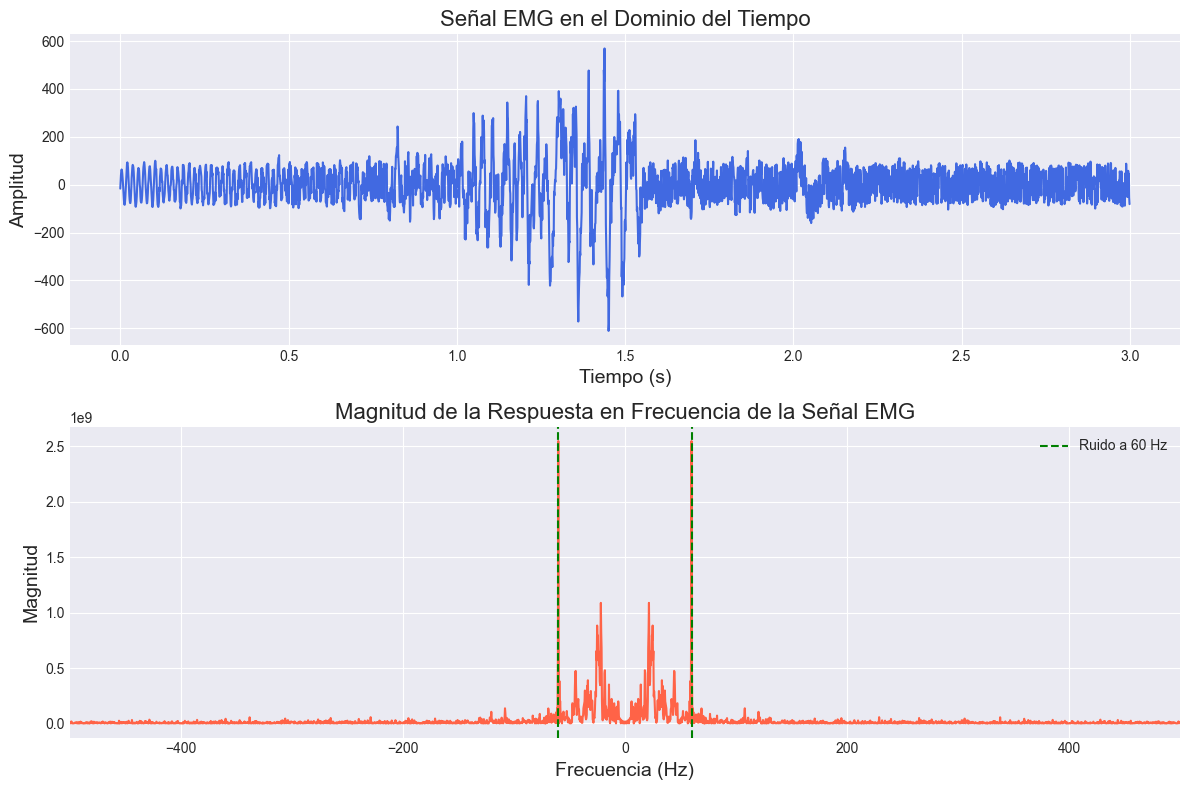

In [4]:
emg_signal = np.load("EMG_raw.npy")  
fs = 1000  
n_samples = len(emg_signal)
t = np.arange(n_samples) / fs

fft_emg_signal = np.fft.fftshift(np.fft.fft(emg_signal))
freq = (np.arange(n_samples) - n_samples/2) * fs / n_samples
magnitud_fft_emg_signal = np.abs(fft_emg_signal)**2
plt.style.use('seaborn-darkgrid')  
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
ax1.plot(t, emg_signal, color='royalblue')
ax1.set_title('Señal EMG en el Dominio del Tiempo', fontsize=16)
ax1.set_xlabel('Tiempo (s)', fontsize=14)
ax1.set_ylabel('Amplitud', fontsize=14)
ax1.grid(True)
ax2.plot(freq, magnitud_fft_emg_signal, color='tomato')
ax2.axvline(60, color='green', linestyle='--', label='Ruido a 60 Hz')
ax2.axvline(-60, color='green', linestyle='--')
ax2.set_title('Magnitud de la Respuesta en Frecuencia de la Señal EMG', fontsize=16)
ax2.set_xlabel('Frecuencia (Hz)', fontsize=14)
ax2.set_ylabel('Magnitud', fontsize=14)
ax2.set_xlim(-fs/2, fs / 2)  
ax2.legend()
ax2.grid(True)
plt.tight_layout()
plt.show()

b) [Tarea asíncrona] Diseñar un filtro FIR utilizando el método de ventanas con una ventana de
Hamming, con frecuencia de corte de 50 Hz y 33 coeficientes. Graficar la respuesta impulsiva, su
magnitud y fase de la respuesta en frecuencia para ambas ventanas, comparándolas con la
respuesta ideal (1 punto).

C:\Users\Hineill\AppData\Local\Temp\ipykernel_26612\1767709884.py:13: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(coeficiente_filtro_enventanado, use_line_collection=True, basefmt=" ")


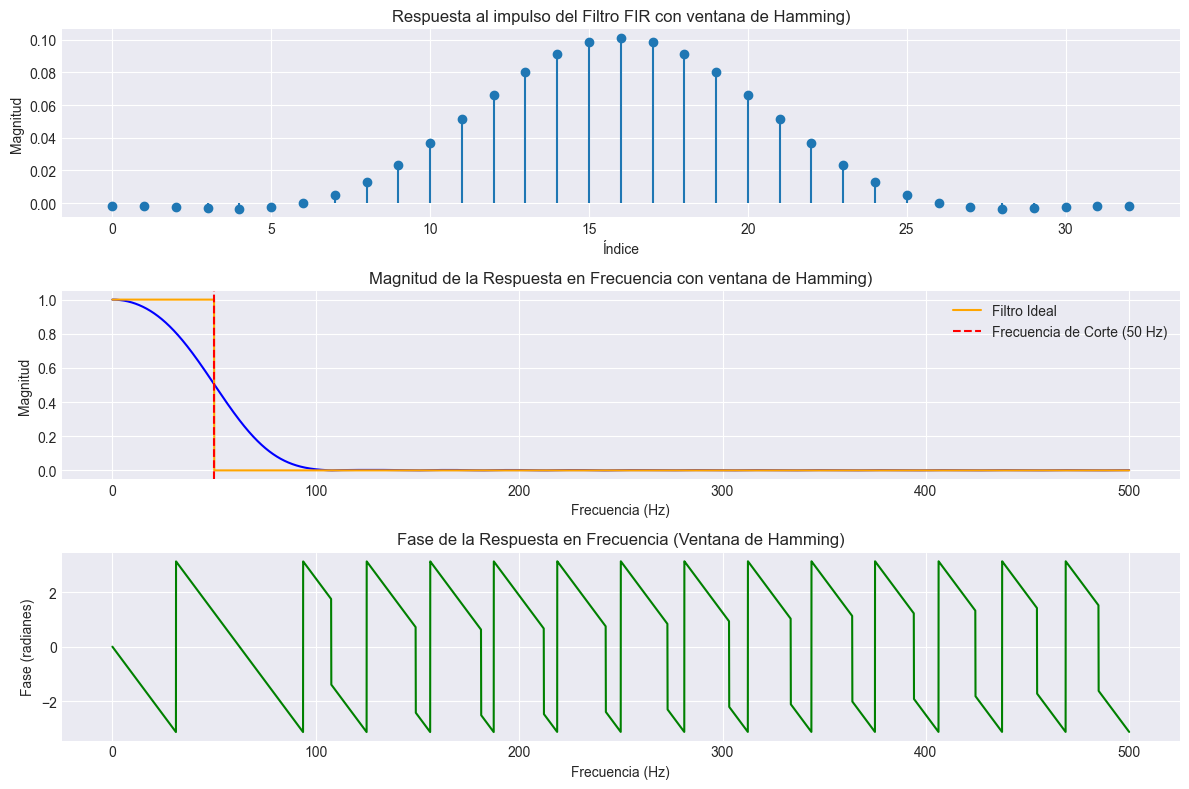

In [8]:
from scipy.signal import firwin, freqz
fs = 1000  
fc = 50   
# Diseño del filtro FIR con ventana de Hamming
#ASUMIMOS QUE LA FRECUENCIA DE MUESTREO DE LA SINC ES EL MISMO Q EL DE LA SEÑAL DEL ELECTROCARDIOGRAMA
coeficiente_filtro_enventanado = firwin(33, fc, fs=fs, window="hamming")
#CALCULAMOS LA RESPUESTA EN FRECUENCIA DEL FILTRO 
w, h = freqz(coeficiente_filtro_enventanado, worN=10000, fs=fs)
# Graficar la respuesta impulsiva del filtro
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.stem(coeficiente_filtro_enventanado, use_line_collection=True, basefmt=" ")
plt.title("Respuesta al impulso del Filtro FIR con ventana de Hamming)")
plt.xlabel("Índice")
plt.ylabel("Magnitud")
# Graficar la magnitud de la respuesta en frecuencia
plt.subplot(3, 1, 2)
plt.plot(w, abs(h), color='blue')
plt.plot(w, np.where(w <= fc, 1, 0), color='orange', label="Filtro Ideal")  # +1e-10 para evitar log(0)
plt.title("Magnitud de la Respuesta en Frecuencia con ventana de Hamming)")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Magnitud")
plt.grid(True)
plt.axvline(50, color='red', linestyle='--', label="Frecuencia de Corte (50 Hz)")
plt.legend()
plt.subplot(3, 1, 3)
plt.plot(w, np.angle(h), color='green')
plt.title("Fase de la Respuesta en Frecuencia (Ventana de Hamming)")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Fase (radianes)")
plt.grid(True)
plt.tight_layout()
plt.show()

c) Diseñar un filtro FIR utilizando el método de mínimos cuadrados con 45 muestras en
frecuencia, 33 coeficientes y frecuencia de corte de 50 Hz. Graficar la magnitud y fase de la
respuesta en frecuencia, comparándola con la respuesta ideal (1 punto).

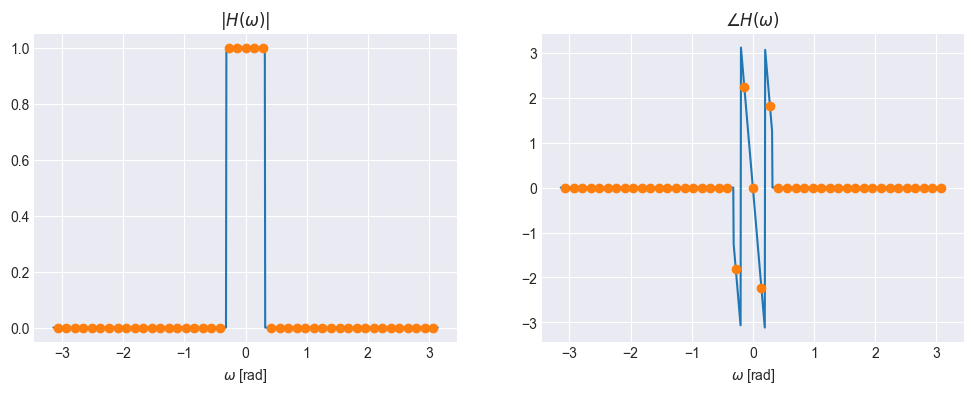

In [9]:
num_samples=45
num_coe=33
f_c = 50 #Hz  


# Filtro pasabajos ideal truncado

fc = 50/fs
wc = fc*2*np.pi

def HPB(w,wc,nd):
    mask = np.abs(w)<=wc
    H = np.exp(-1j*w*nd)
    H[~mask] = 0
    return H

Nw = 45 # Número de muestras en frecuencia
M = 33 # Longitud del filtro

w = 2*np.pi*(np.arange(Nw)-np.fix(Nw/2)) / Nw
Hw = HPB(w,wc,(M-1)/2)

wid = np.linspace(-np.pi,np.pi,1001)
Hid = HPB(wid,wc,(M-1)/2)

fig = plt.figure(figsize=[12,4])
plt.subplot(1,2,1)
plt.plot(wid,np.abs(Hid))
plt.plot(w,np.abs(Hw),'o')
plt.xlabel('$\omega$ [rad]')
plt.title('$|H(\omega)|$')
plt.grid('on')

plt.subplot(1,2,2)
plt.plot(wid,np.angle(Hid))
plt.plot(w,np.angle(Hw),'o')
plt.xlabel('$\omega$ [rad]')
plt.title('$\\angle H(\omega)$')
plt.grid('on')

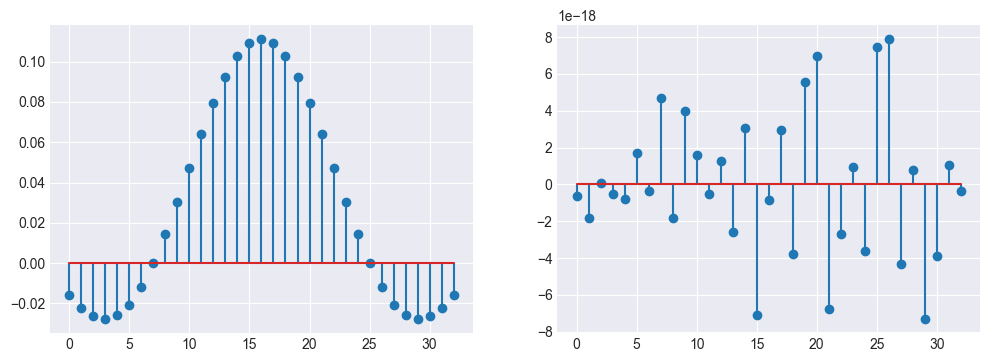

In [10]:
# Matriz de Fourier

A = np.zeros((Nw,M),dtype=complex)
n = np.arange(M)
for k in range(Nw):
    A[k,:] = np.exp(-1j*w[k]*n)

hn = np.matmul(np.linalg.inv(np.matmul(np.conj(A.T),A)),np.matmul(np.conj(A.T),Hw))

fig = plt.figure(figsize=[12,4])
plt.subplot(1,2,1)
plt.stem(np.real(hn))
plt.grid('on')

plt.subplot(1,2,2)
plt.stem(np.imag(hn))
plt.grid('on')

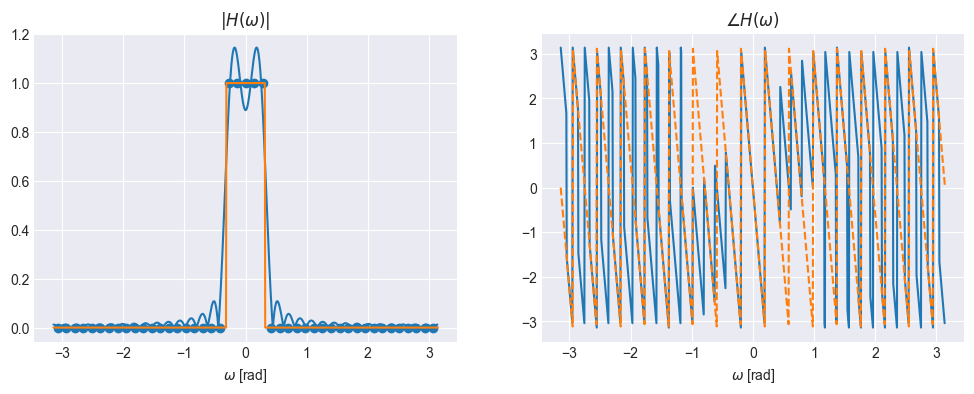

In [11]:
# Respuesta en frecuencia

N = 1024
Homg = np.fft.fft(np.real(hn),N)
Homg = np.fft.fftshift(Homg)
omg = 2*np.pi*(np.arange(0,N) - N/2)/N

fig = plt.figure(figsize=[12,4])
plt.subplot(1,2,1)
plt.plot(omg,np.abs(Homg))
plt.plot(w,np.abs(Hw),'C0o')
plt.plot(wid,np.abs(Hid))
plt.xlabel('$\omega$ [rad]')
plt.title('$|H(\omega)|$')
plt.grid('on')

plt.subplot(1,2,2)
plt.plot(omg,np.angle(Homg))
plt.plot(wid,np.angle(np.exp(-1j*wid*(M-1)/2)),'--')
plt.xlabel('$\omega$ [rad]')
plt.title('$\\angle H(\omega)$')
plt.grid('on')


d) Diseñar un filtro FIR utilizando el método de muestreo en frecuencia, con frecuencia de corte
de 50 Hz, y 33 coeficientes. Graficar la magnitud y fase de la respuesta en frecuencia, y
compararlas con la respuesta ideal (1 punto).

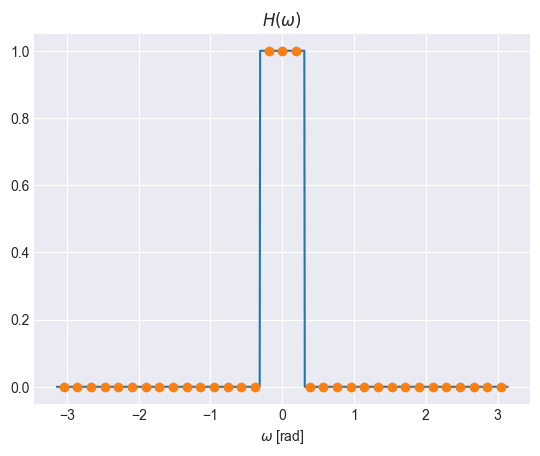

In [12]:
fc = 50/fs
wc = fc*2*np.pi
Nw = 33
w = 2*np.pi*(np.arange(Nw)-((Nw-1)/2)) / Nw
#w = 2*np.pi*(np.arange(Nw)-np.fix(Nw/2)) / Nw

def HPB(w,wc):
    H = 1*(np.abs(w)<wc)
    return H

Hw = HPB(w,wc)

wid = np.linspace(-np.pi,np.pi,1001)
Hid = HPB(wid,wc)

fig = plt.figure()
plt.plot(wid,Hid)
plt.plot(w,Hw,'o')
plt.xlabel('$\omega$ [rad]')
plt.title('$H(\omega)$')
plt.grid('on')

e) Aplicar los filtros diseñados (Hamming, mínimos cuadrados y muestreo en frecuencia) a la señal
EMG. Graficar las señales filtradas en el dominio del tiempo y las magnitudes de sus respectivas
respuestas en el dominio de la frecuencia comparándolas la magnitud de la respuesta en
frecuencia de la señal original. Mencionar qué filtro logró el mejor desempeño y por qué (1
punto).

PREGUNTA 2
Se busca comparar el rendimiento de dos filtros IIR clásicos (Chebyshev y Butterworth) en la eliminación
de ruido en la señal EMG.

a) Diseñar un filtro Chebyshev tipo I de orden 2 utilizando el método de invariancia al impulso, con
frecuencia de corte de 50 Hz. Graficar la magnitud y la fase de la respuesta en frecuencia del
filtro (1 punto).

b) Diseñar un filtro Butterworth de orden 2 utilizando la transformación bilineal y frecuencia de
corte de 50 Hz. Graficar la magnitud y la fase de la respuesta en frecuencia del filtro (1 punto).

c) Aplicar ambos filtros (Chebyshev y Butterworth) a la señal EMG y graficar las señales filtradas
en el dominio del tiempo y las magnitudes de sus respectivas respuestas en el dominio de la frecuencia comparándolas con la magnitud de la respuesta en frecuencia de la señal original (1
punto).

PREGUNTA 3 
Se busca analizar las diferencias del retardo de grupo entre filtros FIR e IIR.

a) Graficar las señales filtradas utilizando el filtro FIR de Hamming y el filtro Butterworth entre 1 y
2.5 segundos de la señal EMG, comparándolas en el dominio del tiempo. Mencionar las
diferencias observadas (0.5 puntos)

b) Calcular y graficar el retardo de grupo del filtro FIR de Hamming (Sugerencia: Investigue el
comando group_delay de scipy.signal) y del filtro IIR Butterworth (1.5 puntos).


c) Corregir la señal filtrada con el filtro FIR de Hamming aplicando el retardo de grupo calculado
previamente. Graficar la señal filtrada original y la señal filtrada corregida en el dominio del
tiempo, comparándolas entre 1 y 2.5 segundos respecto a la señal original (1.5 puntos).